In [2]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 57.1 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import pandas as pd
import numpy as np
import time
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from tqdm import tqdm

In [4]:
from statsmodels_regression import *
from enhanced_linear_regression import *

In [5]:
repetitions=10

## Prep data

In [6]:
sample_size = []    
stats_model=[]
wrapper_statsmodel = []
sklearn_lr = []
enhanced_model = []

for sample_ in tqdm(range(5,100,5)):
    for i in range(repetitions):
        sample_size.append(sample_)


    # Preping Dataset
    X, y, real_coef = make_regression(n_samples=100000, n_features=sample_, n_informative=int(np.ceil(sample_*0.25)), bias=0.3, noise=0.2, coef=True, random_state=42)
    X2 = sm.add_constant(X)
    n=["X_" + str(i+1) for i in range(0,X.shape[1])]
    X_named = pd.DataFrame(X, columns=n)

    # Test statsmodel
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        est = sm.OLS(y, X2)
        est2 = est.fit()
        taken_time = time.time()-starttime
        del est, est2
        stats_model.append(taken_time)
    #stats_model.append(np.mean(temp))

    # Wrapper statsmodel
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        lm = statsmodels_regression(add_constant=True)
        lm.fit(X_named,y)
        taken_time = time.time()-starttime
        del lm
        wrapper_statsmodel.append(taken_time)
    #wrapper_statsmodel.append(np.mean(temp))

    # Statsmodel
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        lm=LinearRegression(n_jobs=1, fit_intercept=True)
        lm.fit(X,y)
        taken_time = time.time()-starttime
        del lm
        sklearn_lr.append(taken_time)
    #sklearn_lr.append(np.mean(temp))

    # Enhanced sklearn ## our solution
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        lm=EnhancedLinearRegression(n_jobs=1, fit_intercept=True)
        lm.fit(X_named,y)
        taken_time = time.time()-starttime
        enhanced_model.append(taken_time)
        del lm
    #enhanced_model.append(np.mean(temp))

100%|██████████| 19/19 [13:34<00:00, 42.86s/it] 


In [7]:
results = pd.DataFrame(np.array([sample_size, stats_model, wrapper_statsmodel, sklearn_lr, enhanced_model]).T, columns=["Variables", "Statsmodel", "Wrapper Statsmodel", "Sklearn", "Enhanced Sklearn"])

In [8]:
print(results)

     Variables  Statsmodel  Wrapper Statsmodel   Sklearn  Enhanced Sklearn
0          5.0    0.102769            0.062803  0.076939          0.008047
1          5.0    0.035390            0.047246  0.003582          0.003536
2          5.0    0.034781            0.046931  0.003661          0.003447
3          5.0    0.035748            0.046853  0.006116          0.003819
4          5.0    0.033429            0.060989  0.004477          0.003413
..         ...         ...                 ...       ...               ...
185       95.0    7.548280            1.538140  0.036163          0.039256
186       95.0    7.599251            1.529327  0.035935          0.039464
187       95.0    9.586065            1.546556  0.035553          0.039328
188       95.0   10.163843            1.554067  0.036174          0.038902
189       95.0    7.855836            1.570722  0.036891          0.038137

[190 rows x 5 columns]


In [9]:
print(results.describe())

        Variables  Statsmodel  Wrapper Statsmodel     Sklearn  \
count  190.000000  190.000000          190.000000  190.000000   
mean    50.000000    2.112327            2.010682    0.043894   
std     27.458482    2.843667            2.768453    0.046014   
min      5.000000    0.033429            0.031227    0.003530   
25%     25.000000    0.214328            0.267527    0.011202   
50%     50.000000    0.721485            0.722180    0.022272   
75%     75.000000    3.462147            2.429091    0.072497   
max     95.000000   10.574296           12.086713    0.166124   

       Enhanced Sklearn  
count        190.000000  
mean           0.043931  
std            0.046776  
min            0.003413  
25%            0.012510  
50%            0.022212  
75%            0.070441  
max            0.182458  


In [10]:
print(results.groupby("Variables").mean())

           Statsmodel  Wrapper Statsmodel   Sklearn  Enhanced Sklearn
Variables                                                            
5.0          0.041809            0.046041  0.011502          0.004117
10.0         0.063540            0.090941  0.007525          0.006754
15.0         0.110777            0.109921  0.005972          0.007230
20.0         0.125711            0.246096  0.006548          0.008584
25.0         0.190839            0.291258  0.009342          0.011987
30.0         0.265828            0.258558  0.015523          0.016766
35.0         0.373623            0.453530  0.019727          0.020617
40.0         0.697004            0.475845  0.015782          0.013896
45.0         0.378912            0.425137  0.017496          0.015886
50.0         0.486888            1.284089  0.079104          0.078741
55.0         3.565916            4.025641  0.091754          0.093047
60.0         4.273005            1.661014  0.022093          0.022060
65.0         0.75539

In [11]:
print(results.groupby("Variables").std())

           Statsmodel  Wrapper Statsmodel   Sklearn  Enhanced Sklearn
Variables                                                            
5.0          0.021441            0.011493  0.023005          0.001403
10.0         0.026125            0.018867  0.000916          0.002116
15.0         0.029057            0.009501  0.001018          0.000932
20.0         0.017604            0.024538  0.000966          0.000580
25.0         0.038705            0.046197  0.001423          0.000908
30.0         0.024792            0.022745  0.001756          0.000938
35.0         0.041051            0.065417  0.001790          0.001903
40.0         0.151285            0.285426  0.003801          0.001131
45.0         0.006387            0.014024  0.004790          0.000294
50.0         0.095920            0.796118  0.017839          0.012609
55.0         0.659466            0.998903  0.017415          0.007746
60.0         0.653077            1.575760  0.002915          0.000245
65.0         0.01686

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

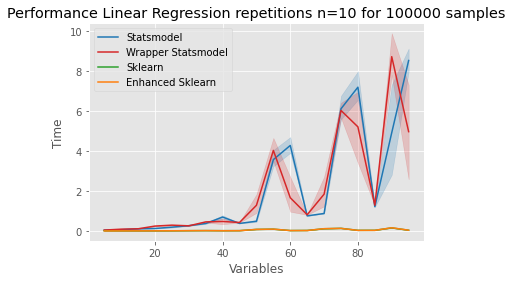

In [13]:
for name, color in zip(["Statsmodel", "Wrapper Statsmodel", "Sklearn", "Enhanced Sklearn"], ["tab:blue", "tab:red", "tab:green", "tab:orange"]):
    sns.lineplot(x=results["Variables"], y=results[name], label=name, color=color)
plt.ylabel("Time")
plt.title("Performance Linear Regression repetitions n="+str(repetitions)+ " for 100000 samples")
plt.show()